# Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

# Import Data

In [3]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

data_train['train_test'] = 1
data_test['train_test'] = 0
data_test['Transported'] = np.NaN
all_data = pd.concat([data_train, data_test])
all_data.head()

E:\Users\kbufn\AppData\Local\Temp\ipykernel_15556\241419670.py:7: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To retain the old behavior, explicitly cast bool-dtype arrays to numeric dtype.
  all_data = pd.concat([data_train, data_test])


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,train_test
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1.0,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0.0,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0.0,1
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1.0,1


# Preview the dataset

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
data_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
#Convert True/False to 1/0
#data_train['Transported'] = data_train['Transported'].astype(int)

In [36]:
#Get the categorical data
df_cat = data_train[['PassengerId','HomePlanet','Cabin','Destination','Name','VIP','CryoSleep','Transported']]
#Get the numerical data
df_num = data_train[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]

# df_num['Transported'] = df_num['Transported'].astype(int)
# df_num['VIP'] = df_num['VIP'].astype(int)
# df_num['CryoSleep'] = df_num['CryoSleep'].astype(int)

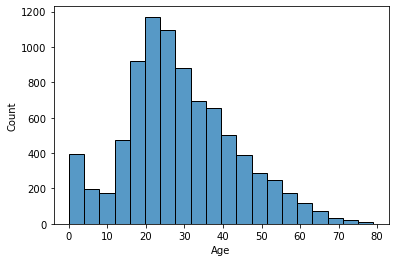

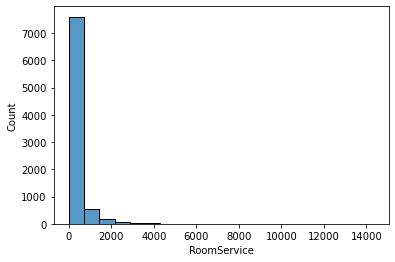

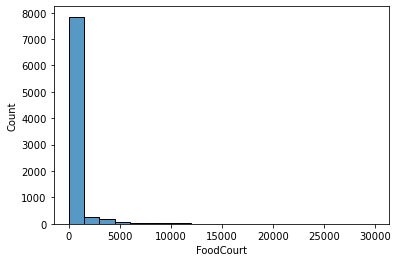

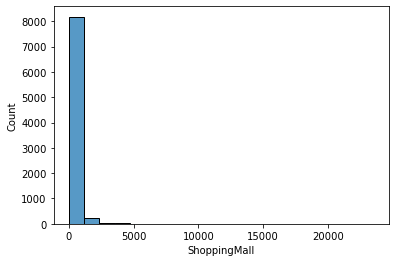

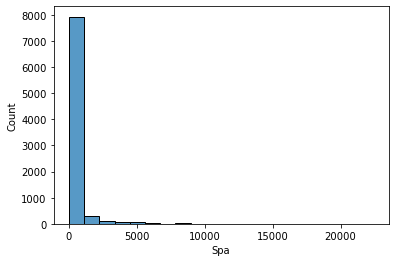

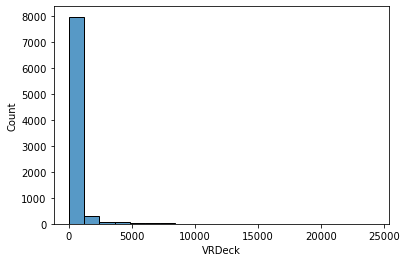

In [32]:
for i in df_num.columns:
    sns.histplot(df_num[i],bins=20)
    plt.show()

                   Age  RoomService  FoodCourt  ShoppingMall       Spa  \
Age           1.000000     0.068723   0.130421      0.033133  0.123970   
RoomService   0.068723     1.000000  -0.015889      0.054480  0.010080   
FoodCourt     0.130421    -0.015889   1.000000     -0.014228  0.221891   
ShoppingMall  0.033133     0.054480  -0.014228      1.000000  0.013879   
Spa           0.123970     0.010080   0.221891      0.013879  1.000000   
VRDeck        0.101007    -0.019581   0.227995     -0.007322  0.153821   

                VRDeck  
Age           0.101007  
RoomService  -0.019581  
FoodCourt     0.227995  
ShoppingMall -0.007322  
Spa           0.153821  
VRDeck        1.000000  


<AxesSubplot:>

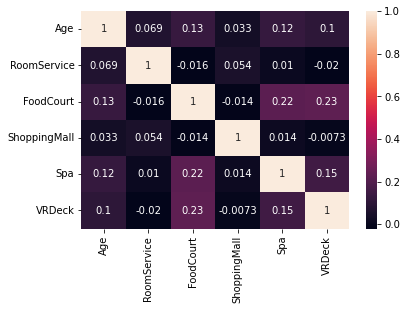

In [33]:
#Compute pairwise correlation of columns
print(df_num.corr())
#Create the heatmap based on the correlation
sns.heatmap(data = df_num.corr(), annot = True)

In [34]:
pd.pivot_table(data_train, index = 'Transported', values = df_num.columns)

,Age,FoodCourt,RoomService,ShoppingMall,Spa,VRDeck
Transported,,,,,,
False,29.922858,382.615930,389.266066,167.566217,564.382666,543.629822
True,27.748834,532.691984,63.098021,179.829972,61.675531,69.148131


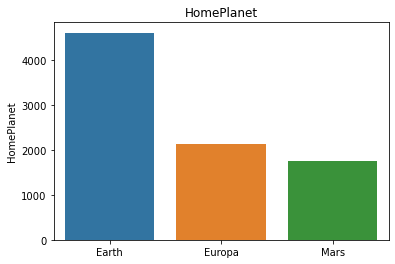

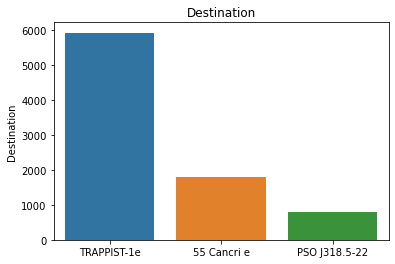

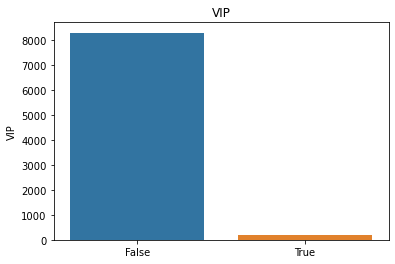

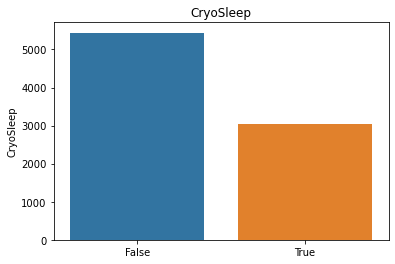

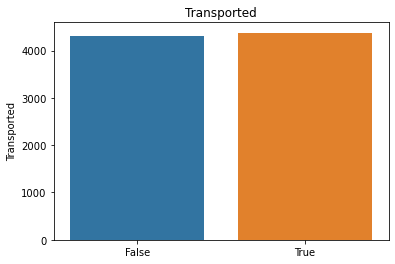

In [40]:
for i in df_cat.columns.drop(['PassengerId','Name','Cabin']):
    sns.barplot(x = df_cat[i].value_counts().index, y = df_cat[i].value_counts()).set_title(i)
    plt.show()

In [12]:
print(pd.pivot_table(data_train, index = 'Transported', columns='VIP', values= 'PassengerId', aggfunc='count'))
print()
print(pd.pivot_table(data_train, index = 'Transported', columns='Destination', values= 'PassengerId', aggfunc='count'))
print()
print(pd.pivot_table(data_train, index = 'Transported', columns='CryoSleep', values= 'PassengerId', aggfunc='count'))
print()
print(pd.pivot_table(data_train, index = 'Transported', columns='HomePlanet', values= 'PassengerId', aggfunc='count'))

VIP          False  True
Transported             
0             4093   123
1             4198    76

Destination  55 Cancri e  PSO J318.5-22  TRAPPIST-1e
Transported                                         
0                    702            395         3128
1                   1098            401         2787

CryoSleep    False  True
Transported             
0             3650   554
1             1789  2483

HomePlanet   Earth  Europa  Mars
Transported                     
0             2651     727   839
1             1951    1404   920


# Feature Engineering

In [50]:
all_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,train_test
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1.0,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0.0,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0.0,1
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1.0,1


In [51]:
all_data[['Deck', 'Num', 'Side']] = (
    all_data['Cabin'].str.split('/', expand= True)
)

all_data[['Group','GroupNumber']] = (all_data['PassengerId'].str.split('_', expand=True))

In [52]:
all_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,train_test,Deck,Num,Side,Group,GroupNumber
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0,1,B,0,P,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1.0,1,F,0,S,0002,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0.0,1,A,0,S,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0.0,1,A,0,S,0003,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1.0,1,F,1,S,0004,01


In [53]:
all_data['Destination'].value_counts()

TRAPPIST-1e      8871
55 Cancri e      2641
PSO J318.5-22    1184
Name: Destination, dtype: int64

# Data Preprocessing

In [54]:
all_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,train_test,Deck,Num,Side,Group,GroupNumber
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0,1,B,0,P,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1.0,1,F,0,S,0002,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0.0,1,A,0,S,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0.0,1,A,0,S,0003,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1.0,1,F,1,S,0004,01


In [55]:
missing_values_count = all_data.isnull().sum()
total_cells = np.product(all_data.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells)*100
percent_missing

3.32112567463377

In [56]:
le = LabelEncoder()
all_data['Deck'] = le.fit_transform(all_data['Deck'])
all_data['Side'] = le.fit_transform(all_data['Side'])
all_data['HomePlanet'] = le.fit_transform(all_data['HomePlanet'])
all_data['Group'] = le.fit_transform(all_data['Group'])
all_data['Destination'] = le.fit_transform(all_data['Destination'])

In [57]:
all_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,train_test,Deck,Num,Side,Group,GroupNumber
0,0001_01,1,False,B/0/P,2,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0,1,1,0,0,0,01
1,0002_01,0,False,F/0/S,2,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1.0,1,5,0,1,1,01
2,0003_01,1,False,A/0/S,2,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0.0,1,0,0,1,2,01
3,0003_02,1,False,A/0/S,2,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0.0,1,0,0,1,2,02
4,0004_01,0,False,F/1/S,2,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1.0,1,5,1,1,3,01


In [21]:
# scaler = MinMaxScaler()
# data_train[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = scaler.fit_transform(data_train[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']])


In [89]:
#Split to train and test again

X_train = all_data[all_data.train_test == 1].drop(['train_test'], axis = 1)
y_train = X_train.pop('Transported')

X_test = all_data[all_data.train_test == 0].drop(['train_test'], axis = 1)

X_train = X_train[['HomePlanet','CryoSleep','Destination','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Deck','Num','Side','Group']]
X_test = X_test[['HomePlanet','CryoSleep','Destination','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Deck','Num','Side','Group']]

In [93]:

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

imputed_X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_train = imputed_X_train.copy()

imputed_X_test = pd.DataFrame(imputer.fit_transform(X_test), columns=X_test.columns)
X_test = imputed_X_test.copy()

In [94]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Deck            0
Num             0
Side            0
Group           0
dtype: int64
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Deck            0
Num             0
Side            0
Group           0
dtype: int64


In [63]:
X_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side,Group
0,1.0,0.0,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,2.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,5.0,0.0,1.0,1.0
2,1.0,0.0,2.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0.0,0.0,1.0,2.0
3,1.0,0.0,2.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0.0,0.0,1.0,2.0
4,0.0,0.0,2.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,5.0,1.0,1.0,3.0


# Model building

In [64]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [65]:
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.7027027  0.68430132 0.71880391 0.73187572 0.70253165]
0.7080430600764563


In [66]:
lr = LogisticRegression(max_iter= 2000)
cv = cross_val_score(lr, X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.76710753 0.77975848 0.7906843  0.787687   0.77790564]
0.7806285902973218


In [67]:
dt = tree.DecisionTreeClassifier()
cv = cross_val_score(dt, X_train, y_train,cv=5)
print(cv)
print(cv.mean())

[0.48648649 0.63829787 0.7280046  0.76524741 0.72209436]
0.6680261462647674


In [68]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.54859114 0.54629097 0.57216791 0.72266974 0.54487917]
0.5869197871083138


In [69]:
rf = RandomForestClassifier()
cv = cross_val_score(rf, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.61702128 0.72282921 0.79930995 0.81357883 0.73417722]
0.7373832956919409


In [70]:
svc = SVC(probability= True)
cv = cross_val_score(svc, X_train, y_train,cv=5)
print(cv)
print(cv.mean())

[0.67280046 0.76653249 0.77630822 0.79459148 0.79746835]
0.7615402023966527


In [71]:
xgb = XGBClassifier()
cv = cross_val_score(xgb, X_train, y_train,cv=5)
print(cv)
print(cv.mean())

[0.52156412 0.60897067 0.6986774  0.6881473  0.68987342]
0.641446580875614


In [72]:
gbc = GradientBoostingClassifier()
cv = cross_val_score(gbc, X_train, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.52213916 0.72340426 0.77228292 0.80149597 0.6703107 ]
0.6979266022627186


In [73]:
catboost = CatBoostClassifier(verbose=0)
cv = cross_val_score(catboost, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.5692927  0.64519839 0.75503163 0.70540852 0.66628308]
0.6682428627486532


In [74]:
ridge = RidgeClassifier()
cv = cross_val_score(ridge, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.75560667 0.76710753 0.75618171 0.76754891 0.77157652]
0.7636042697448568


In [75]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators= [('lr',lr),('svc',svc),('ridge',ridge)], voting='hard')

In [76]:
cv = cross_val_score(voting_clf, X_train, y_train, cv = 5, error_score='raise')
print(cv)
print(cv.mean())

[0.76308223 0.78148361 0.78723404 0.79056387 0.78596087]
0.7816649252146155


# Model Tune

In [77]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [78]:
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [79]:
lr = LogisticRegression()
param_grid = [{'max_iter' : [1500,1700,2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}, 
              {'max_iter' : [2000],
              'penalty' : ['l2', 'none'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['lbfgs']}]

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train,y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 160 candidates, totalling 800 fits
Logistic Regression
Best Score: 0.7862645423377984
Best Parameters: {'C': 0.0018329807108324356, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'lbfgs'}


In [80]:
svc = SVC(probability = True)
param_grid = tuned_parameters = {'kernel': ['rbf'], 'gamma': ['scale'],
                                  'C': [1.05, 1.1,1.15]}
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train,y_train)
clf_performance(best_clf_svc,'SVC')

Fitting 5 folds for each of 3 candidates, totalling 15 fits
SVC
Best Score: 0.7616552110222996
Best Parameters: {'C': 1.05, 'gamma': 'scale', 'kernel': 'rbf'}


In [81]:
ridge = RidgeClassifier()
param_grid = {
            'alpha': np.logspace(-4, 4, 20)
            }
clf_ridge = GridSearchCV(ridge, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_ridge = clf_ridge.fit(X_train,y_train)
clf_performance(best_clf_ridge,'ridge')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
ridge
Best Score: 0.7654440107173746
Best Parameters: {'alpha': 545.5594781168514}


# Model Additional Ensemble Approaches

In [ ]:
best_lr = best_clf_lr.best_estimator_
best_svc = best_clf_svc.best_estimator_
best_ridge = best_clf_ridge.best_estimator_

voting_clf_hard = VotingClassifier(estimators=[('best_lr',best_lr),('best_svc', best_svc),('best_ridge',best_ridge)], voting='hard')
voting_clf_soft = VotingClassifier(estimators=[('best_lr',best_lr),('best_svc', best_svc)], voting='soft')

cv = cross_val_score(voting_clf_hard,X_train,y_train,cv=5)
print('voting_clf_hard :',cv)
print('voting_clf_hard mean :',cv.mean())

cv = cross_val_score(voting_clf_soft,X_train,y_train,cv=5)
print('voting_clf_soft :',cv)
print('voting_clf_soft mean :',cv.mean())


In [ ]:
voting_clf_hard.fit(X_train, y_train)
voting_clf_soft.fit(X_train, y_train)

In [95]:
y_hat_vc_hard = voting_clf_hard.predict(X_test).astype(int)
y_hat_vc_soft = voting_clf_soft.predict(X_test).astype(int)

In [97]:
X_test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side,Group
0,0.0,1.0,2.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,3.0,1.0,12.0
1,0.0,0.0,2.0,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,5.0,4.0,1.0,17.0
2,1.0,1.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,18.0
3,1.0,0.0,2.0,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,2.0,1.0,1.0,20.0
4,0.0,0.0,2.0,20.0,0.0,10.0,0.0,635.0,0.0,0.0,5.0,5.0,1.0,22.0


In [109]:
final_data = {'PassengerId': data_test.PassengerId, 'Transported': y_hat_vc_hard.astype(bool)}
submission1 = pd.DataFrame(data = final_data)

final_data2 = {'PassengerId': data_test.PassengerId, 'Transported': y_hat_vc_soft.astype(bool)}
submission2 = pd.DataFrame(data = final_data)

In [110]:
submission1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 37.7+ KB


In [111]:
submission1.to_csv('submission_hard.csv', index=False)
submission2.to_csv('submission_soft.csv', index=False)